In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [3]:
highLumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
lowLumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

higgs = pd.read_pickle('../Lab5/higgs_100000_pt_1000_1200.pkl')
qcd = pd.read_pickle('../Lab5/qcd_100000_pt_1000_1200.pkl')

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

In [3]:
normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

print(normalization_higgs, normalization_qcd)

0.0005 0.02


In [4]:
def theory(n_qcd, n_higgs):
    prob = stats.poisson.sf(n_qcd + n_higgs, n_qcd)
    sigma = stats.norm.isf(prob)
    return sigma

def approximation(n_qcd, n_higgs):
    sigma = n_higgs/np.sqrt(n_qcd)
    return sigma

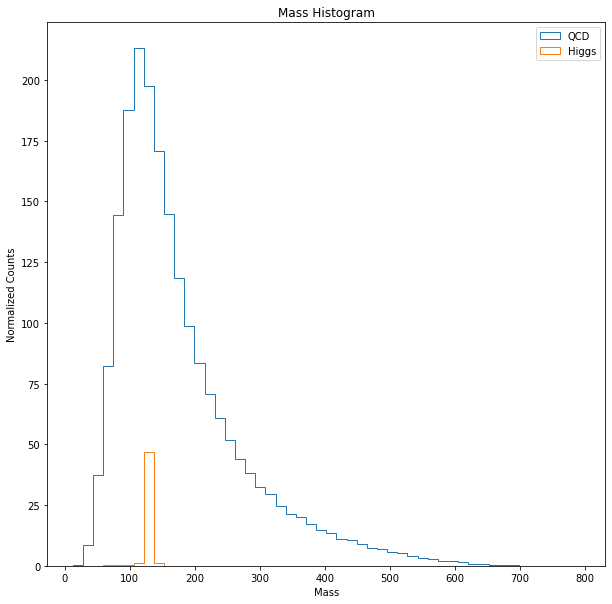

In [5]:
fig, ax = plt.subplots(1, figsize = (10,10))

hist_qcd = ax.hist(qcd['mass'], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD')
hist_higgs = ax.hist(higgs['mass'], weights = np.ones(len(higgs))*normalization_higgs, bins = hist_qcd[1], histtype = 'step', label = 'Higgs')

ax.set_title('Mass Histogram')
ax.set_ylabel('Normalized Counts')
ax.set_xlabel('Mass')
plt.legend()
plt.show()

In [6]:
n_qcd = 2000
n_higgs = 50

prob = stats.poisson.sf(n_qcd + n_higgs, n_qcd)
sigma  = stats.norm.isf(prob)

approx_sig = n_higgs/np.sqrt(n_qcd)

print(sigma, approx_sig)

1.1282230087754423 1.118033988749895


They are not the same, which means that the approximation doesn't match the model that I've used. But it is very close since the model is a Poisson with high mean which is like a Gaussian. The approximation is for a Gaussian.

In [7]:
mass_cut = [180, 150, 140, 135, 130, 125]

for i in mass_cut:
    print(f'mass cut: {i}') 

    cut_qcd = qcd[qcd['mass'] < i]
    cut_higgs = higgs[higgs['mass'] < i]
    
    n_qcd = 2000/len(qcd)*len(cut_qcd)
    n_higgs = 50/len(higgs)*len(cut_higgs)

    print(f'N_qcd: {n_qcd:0.3f} N_higgs: {n_higgs:0.3f}')

    theory_sigma = theory(n_qcd, n_higgs)
    approx_sigma = approximation(n_qcd, n_higgs)

    print(f'theory sigma: {theory_sigma:.3f} approximate sigma: {approx_sigma:.3f}\n')

mass cut: 180
N_qcd: 1279.380 N_higgs: 50.000
theory sigma: 1.397 approximate sigma: 1.398

mass cut: 150
N_qcd: 1017.320 N_higgs: 49.998
theory sigma: 1.566 approximate sigma: 1.568

mass cut: 140
N_qcd: 908.900 N_higgs: 49.643
theory sigma: 1.636 approximate sigma: 1.647

mass cut: 135
N_qcd: 850.200 N_higgs: 47.847
theory sigma: 1.647 approximate sigma: 1.641

mass cut: 130
N_qcd: 786.880 N_higgs: 39.948
theory sigma: 1.407 approximate sigma: 1.424

mass cut: 125
N_qcd: 723.380 N_higgs: 6.176
theory sigma: 0.233 approximate sigma: 0.230



The mass cut that gives the best significance is mass < 135 but it also removes about 2 Higgs particles. I will choose the mass cut to be mass < 140 to optimize the total number of Higgs for further cuts.

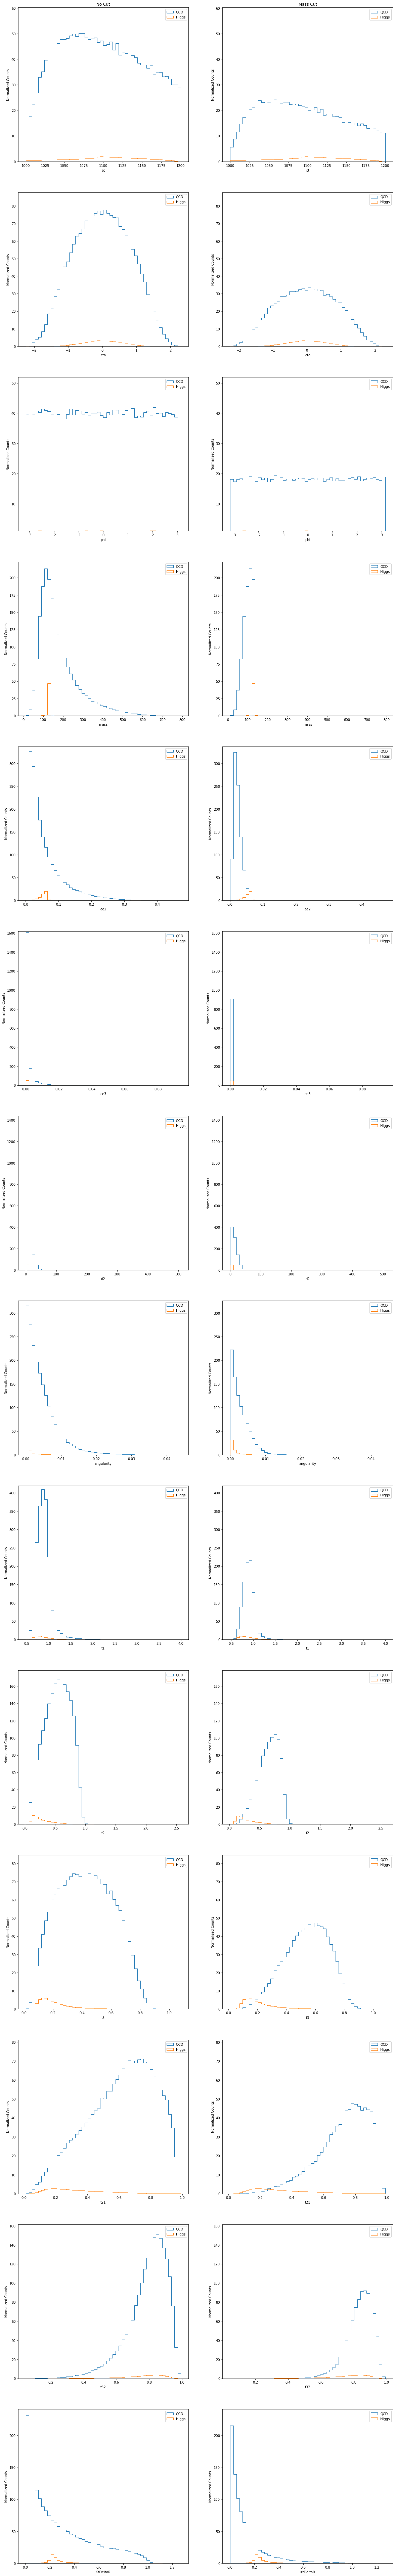

In [10]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

title = ['No Cut', 'Mass Cut']

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

cut_qcd = qcd[qcd['mass']<140]
cut_higgs = higgs[higgs['mass']<140]

def get_ylims(y1, y2, y3, y4):
    all_y = np.hstack((y1, y2, y3, y4))
    
    ymax = all_y.max()+10
    ymin = all_y.min()
    
    #print(all_y)
   
    return ymax, ymin

fig, ax = plt.subplots(14, 2, figsize = (20,140))

for i in range(len(keys)):
    hist1 = ax[i,0].hist(qcd[keys[i]], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step' ,label = 'QCD');
    hist2 = ax[i,0].hist(higgs[keys[i]], weights = np.ones(len(higgs))*normalization_higgs, bins = hist1[1], histtype = 'step' ,label = 'Higgs');

    hist3 = ax[i,1].hist(cut_qcd[keys[i]], weights = np.ones(len(cut_qcd))*normalization_qcd, bins = hist1[1], histtype = 'step' , label = 'QCD');
    hist4 = ax[i,1].hist(cut_higgs[keys[i]], weights = np.ones(len(cut_higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs');
    
    #print(hist1[0], hist2[0], hist3[0], hist4[0])
    
    ymax, ymin = get_ylims(hist1[0], hist2[0], hist3[0], hist4[0])
    #print(ymin, ymax)
    
    for k in range(len(title)):
        ax[i,k].set_ylim(ymin, ymax)
        ax[i,k].set_ylabel('Normalized Counts')
        ax[i,k].set_xlabel(keys[i])          
        ax[i,k].legend()
ax[0,0].set_title(title[0])
ax[0,1].set_title(title[1])
plt.show()

In [11]:
t21_cut = [0.6, 0.5, 0.4, 0.3, 0.2]

for i in t21_cut:
    print(f't21 cut: {i}') 
    cut2_qcd = cut_qcd[cut_qcd['t21'] < i]
    cut2_higgs = cut_higgs[cut_higgs['t21'] < i]
    
    n_qcd = 2000/len(qcd)*len(cut2_qcd)
    n_higgs = 50/len(higgs)*len(cut2_higgs)

    print(f'N_qcd: {n_qcd:0.3f} N_higgs: {n_higgs:0.3f}')

    theory_sigma = theory(n_qcd, n_higgs)
    approx_sigma = approximation(n_qcd, n_higgs)

    print(f'theory sigma: {theory_sigma:.3f} approximate sigma: {approx_sigma:.3f}\n')

t21 cut: 0.6
N_qcd: 191.760 N_higgs: 44.925
theory sigma: 3.128 approximate sigma: 3.244

t21 cut: 0.5
N_qcd: 99.100 N_higgs: 40.334
theory sigma: 3.837 approximate sigma: 4.052

t21 cut: 0.4
N_qcd: 43.800 N_higgs: 33.987
theory sigma: 4.611 approximate sigma: 5.135

t21 cut: 0.3
N_qcd: 15.460 N_higgs: 25.300
theory sigma: 5.320 approximate sigma: 6.435

t21 cut: 0.2
N_qcd: 3.360 N_higgs: 13.406
theory sigma: 5.188 approximate sigma: 7.314



The t21 cut that gives the best significance is t21 < 0.3

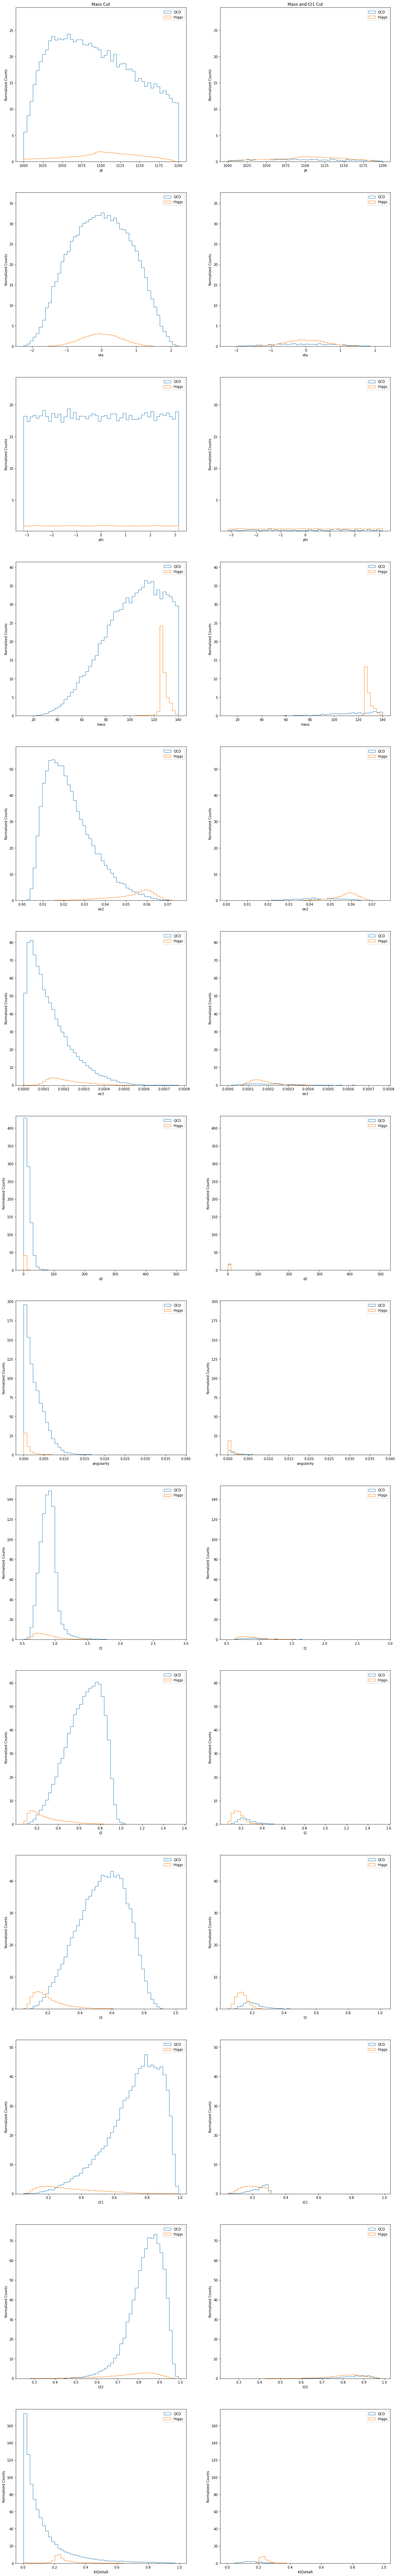

In [12]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

title = ['Mass Cut', 'Mass and t21 Cut']

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

cut_qcd = qcd[qcd['mass']<140]
cut_higgs = higgs[higgs['mass']<140]

cut2_qcd = cut_qcd[cut_qcd['t21'] < 0.3]
cut2_higgs = cut_higgs[cut_higgs['t21'] < 0.3]

def get_ylims(y3, y4, y5, y6):
    all_y = np.hstack((y3, y4, y5, y6))
    
    ymax = all_y.max()+5
    ymin = all_y.min()
    
    #print(all_y)
   
    return ymax, ymin

fig, ax = plt.subplots(14, 2, figsize = (20,140))

for i in range(len(keys)):
   
    hist3 = ax[i,0].hist(cut_qcd[keys[i]], weights = np.ones(len(cut_qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD');
    hist4 = ax[i,0].hist(cut_higgs[keys[i]], weights = np.ones(len(cut_higgs))*normalization_higgs, bins = hist3[1], histtype = 'step', label = 'Higgs');

    hist5 = ax[i,1].hist(cut2_qcd[keys[i]], weights = np.ones(len(cut2_qcd))*normalization_qcd, bins = hist3[1], histtype = 'step', label = 'QCD');
    hist6 = ax[i,1].hist(cut2_higgs[keys[i]], weights = np.ones(len(cut2_higgs))*normalization_higgs, bins = hist3[1], histtype = 'step', label = 'Higgs');
    
    ymax, ymin = get_ylims(hist3[0], hist4[0], hist5[0], hist6[0])

    
    for k in range(len(title)):
        ax[i,k].set_ylim(ymin, ymax)
        ax[i,k].set_ylabel('Normalized Counts')
        ax[i,k].set_xlabel(keys[i])          
        ax[i,k].legend()
ax[0,0].set_title(title[0])
ax[0,1].set_title(title[1])

plt.show()

In [13]:
ktdeltar_cut = [0.1, 0.2, 0.25]

for i in ktdeltar_cut:
    print(f'ktdeltar cut: {i}') 
    cut3_qcd = cut2_qcd[cut2_qcd['KtDeltaR'] > i]
    cut3_higgs = cut2_higgs[cut2_higgs['KtDeltaR'] > i]
    
    n_qcd = 2000/len(qcd)*len(cut3_qcd)
    n_higgs = 50/len(higgs)*len(cut3_higgs)
    
    print(f'N_qcd: {n_qcd:0.3f} N_higgs: {n_higgs:0.3f}')

    theory_sigma = theory(n_qcd, n_higgs)
    approx_sigma = approximation(n_qcd, n_higgs)

    print(f'theory sigma: {theory_sigma:.3f} approximate sigma: {approx_sigma:.3f}\n')

ktdeltar cut: 0.1
N_qcd: 13.620 N_higgs: 25.296
theory sigma: 5.537 approximate sigma: 6.854

ktdeltar cut: 0.2
N_qcd: 3.520 N_higgs: 24.398
theory sigma: 8.126 approximate sigma: 13.004

ktdeltar cut: 0.25
N_qcd: 1.040 N_higgs: 7.030
theory sigma: 4.665 approximate sigma: 6.894



The KtDeltaR cut that gives the best significance is KtDeltaR > 0.2

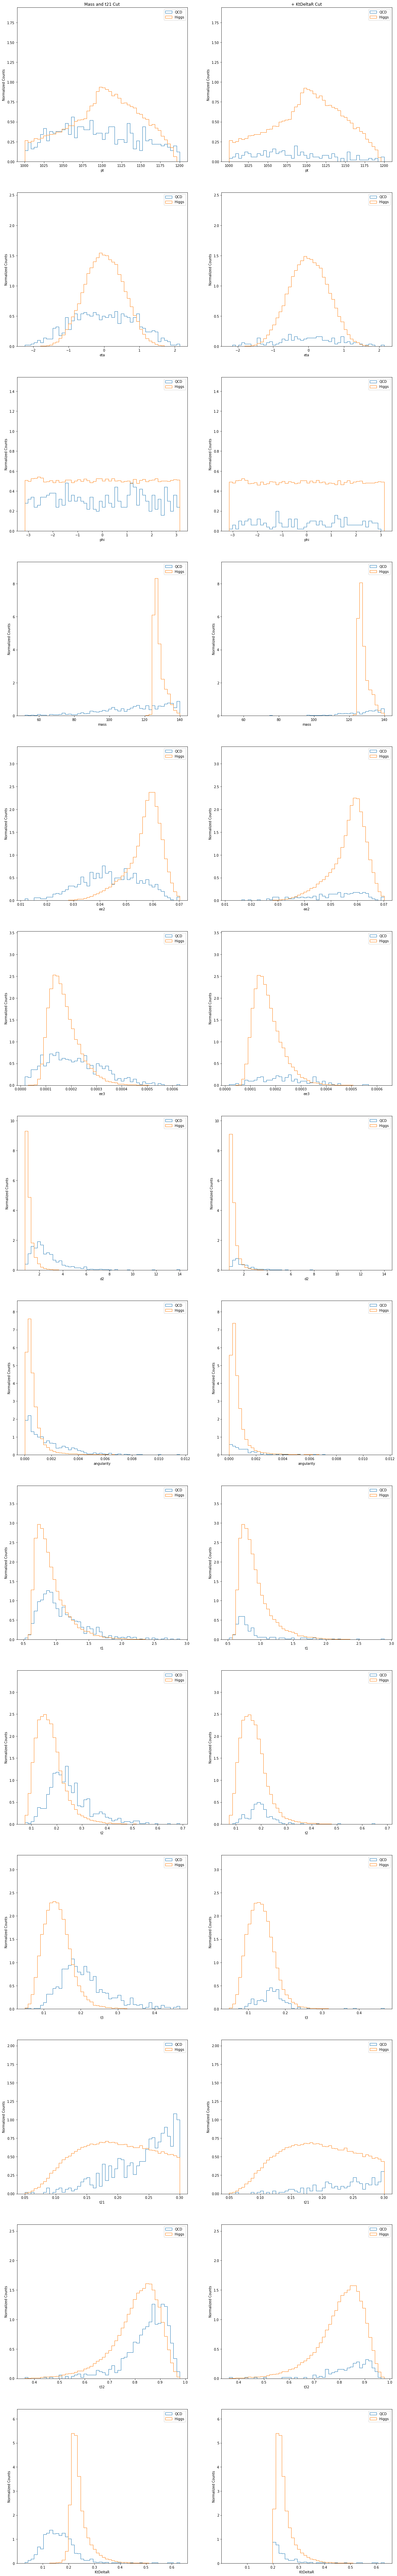

In [14]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

title = ['Mass and t21 Cut', '+ KtDeltaR Cut']

normalization_higgs = 50/len(higgs)
normalization_qcd = 2000/len(qcd)

cut_qcd = qcd[qcd['mass']<140]
cut_higgs = higgs[higgs['mass']<140]

cut2_qcd = cut_qcd[cut_qcd['t21'] < 0.3]
cut2_higgs = cut_higgs[cut_higgs['t21'] < 0.3]

cut3_qcd = cut2_qcd[cut2_qcd['KtDeltaR'] > 0.2]
cut3_higgs = cut2_higgs[cut2_higgs['KtDeltaR'] > 0.2]

def get_ylims(y1, y2, y3, y4):
    all_y = np.hstack((y1, y2, y3, y4))
    
    ymax = all_y.max()+1
    ymin = all_y.min()
       
    return ymax, ymin

fig, ax = plt.subplots(14, 2, figsize = (20,140))

for i in range(len(keys)):
   
    hist1 = ax[i,0].hist(cut2_qcd[keys[i]], weights = np.ones(len(cut2_qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD');
    hist2 = ax[i,0].hist(cut2_higgs[keys[i]], weights = np.ones(len(cut2_higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs');

    hist3 = ax[i,1].hist(cut3_qcd[keys[i]], weights = np.ones(len(cut3_qcd))*normalization_qcd, bins = hist1[1], histtype = 'step', label = 'QCD');
    hist4 = ax[i,1].hist(cut3_higgs[keys[i]], weights = np.ones(len(cut3_higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs');
    
    ymax, ymin = get_ylims(hist1[0], hist2[0], hist3[0], hist4[0])

    
    for k in range(len(title)):
        ax[i,k].set_ylim(ymin, ymax)
        ax[i,k].set_ylabel('Normalized Counts')
        ax[i,k].set_xlabel(keys[i])          
        ax[i,k].legend()
ax[0,0].set_title(title[0])
ax[0,1].set_title(title[1])

plt.show()

Overall, I chose the cuts: mass < 140, t21 < 0.3, ktdeltar > 0.2. These cuts give a significance of around 8$\sigma$.

## Testing out some supervised learning:

Using a random forest classifier, I train it on the entire higgs and qcd data set.

In [4]:
keys = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR']

X = pd.concat([higgs, qcd], ignore_index = True)
Y = np.hstack((np.ones(len(higgs)), np.zeros(len(qcd))))

print(X.shape, Y.shape)

(200000, 14) (200000,)


In [5]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X,Y)
result = permutation_importance(clf, X, Y)
means = result.importances_mean

RandomForestClassifier(n_estimators=10)

In [11]:
feature_importance = np.vstack((keys, clf.feature_importances_))
feature_importance.sort(axis = 1)
print('Feature Importance')
for i in range(len(feature_importance[0])):
    print(f'{feature_importance[0][i]}: {float(feature_importance[1][i]):.3f}')
print('\nPermutation Importance')
importance_withkeys = np.vstack((keys, means))
importance_withkeys.sort(axis = 1)
for i in range(len(means)):
    print(f'{importance_withkeys[0][i]}: {float(importance_withkeys[1][i]):.3f}')

Feature Importance
KtDeltaR: 0.007
angularity: 0.010
d2: 0.013
ee2: 0.016
ee3: 0.018
eta: 0.018
mass: 0.019
phi: 0.046
pt: 0.056
t1: 0.119
t2: 0.119
t21: 0.126
t3: 0.149
t32: 0.284

Permutation Importance
KtDeltaR: 0.004
angularity: 0.008
d2: 0.009
ee2: 0.009
ee3: 0.011
eta: 0.014
mass: 0.015
phi: 0.017
pt: 0.020
t1: 0.023
t2: 0.055
t21: 0.059
t3: 0.192
t32: 0.251


Above are the rankings for feature importance from lowest to highest.

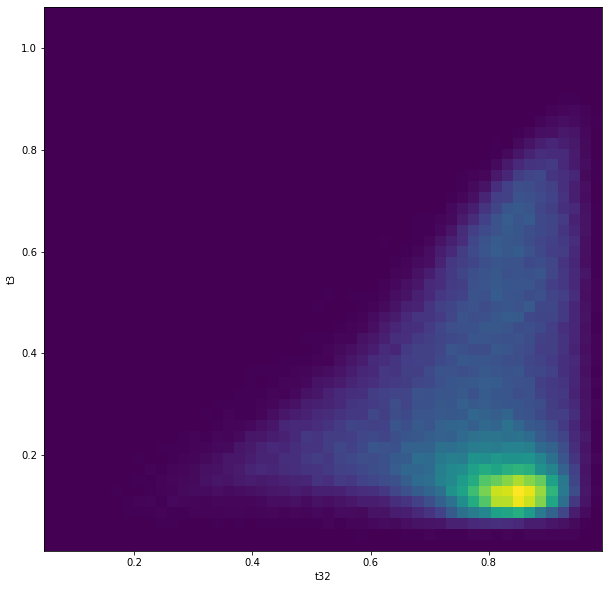

In [32]:
X = pd.concat([higgs, qcd], ignore_index = True)
Y = np.hstack((np.ones(len(higgs)), np.zeros(len(qcd))))

fig, ax = plt.subplots(figsize = (10,10))
ax.hist2d(X['t32'], X['t3'], bins = 50)
ax.set_xlabel('t32')
ax.set_ylabel('t3')
plt.show()

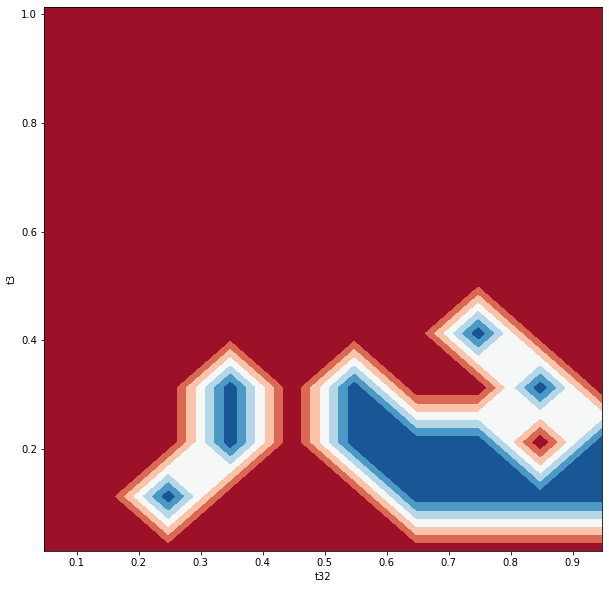

In [22]:
from matplotlib.colors import ListedColormap

X = pd.concat([higgs.loc[:, ['t32', 't3']], qcd.loc[:,['t32', 't3']]]).to_numpy()
Y = np.hstack((np.ones(len(higgs)), np.zeros(len(qcd))))

cmap = plt.cm.RdBu

clf2 = RandomForestClassifier(n_estimators = 10)
clf2 = clf2.fit(X,Y)

#take bounds
xmin, xmax = X[:, 0].min(), X[:, 0].max()
ymin, ymax = X[:, 1].min(), X[:, 1].max()

xgrid = np.arange(xmin, xmax, 0.1)
ygrid = np.arange(ymin, ymax, 0.1)

xx, yy = np.meshgrid(xgrid, ygrid)

# make predictions for the grid
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
# reshape the predictions back into a grid
zz = Z.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
fig, ax = plt.subplots(figsize = (10,10))
ax.contourf(xx, yy, zz, cmap = cmap)
#ax.scatter(X[:, 0],X[:, 1],c=Y,cmap=ListedColormap(["r", "b"]),edgecolor="k",s=20,alpha=.7)

ax.set_xlabel('t32')
ax.set_ylabel('t3')
plt.show()

This is a graph of the decision space for t32 and t3

## Lab 8
Event selection: 
* mass < 130
* t21 < 0.3
* ktdeltar > 0.1

In [50]:
def make_mass_cut(data):
    result = data[data['mass'] < 140]
    return result
def make_t21_cut(data):
    result = data[data['t21'] < 0.3]
    return result
def make_ktdeltar_cut(data):
    result = data[data['KtDeltaR'] > 0.2]
    return result
def make_all_cuts(data):
    data = make_mass_cut(data)
    data = make_t21_cut(data)
    data = make_ktdeltar_cut(data)
    return data

def approximate_sigma(cut_data, data):
    #calculate significance using approximation method
    sigma = len(cut_data)/np.sqrt(len(cut_data))
    return sigma

def calculate_sigma(cut_data, data):
    prob = stats.poisson.cdf(len(data), len(cut_data))
    sigma = stats.norm.ppf(prob)
    return sigma

In [51]:
selected_highLumi = make_all_cuts(highLumi)
selected_lowLumi = make_all_cuts(lowLumi)
selected_qcd = make_all_cuts(qcd)
selected_higgs = make_all_cuts(higgs)

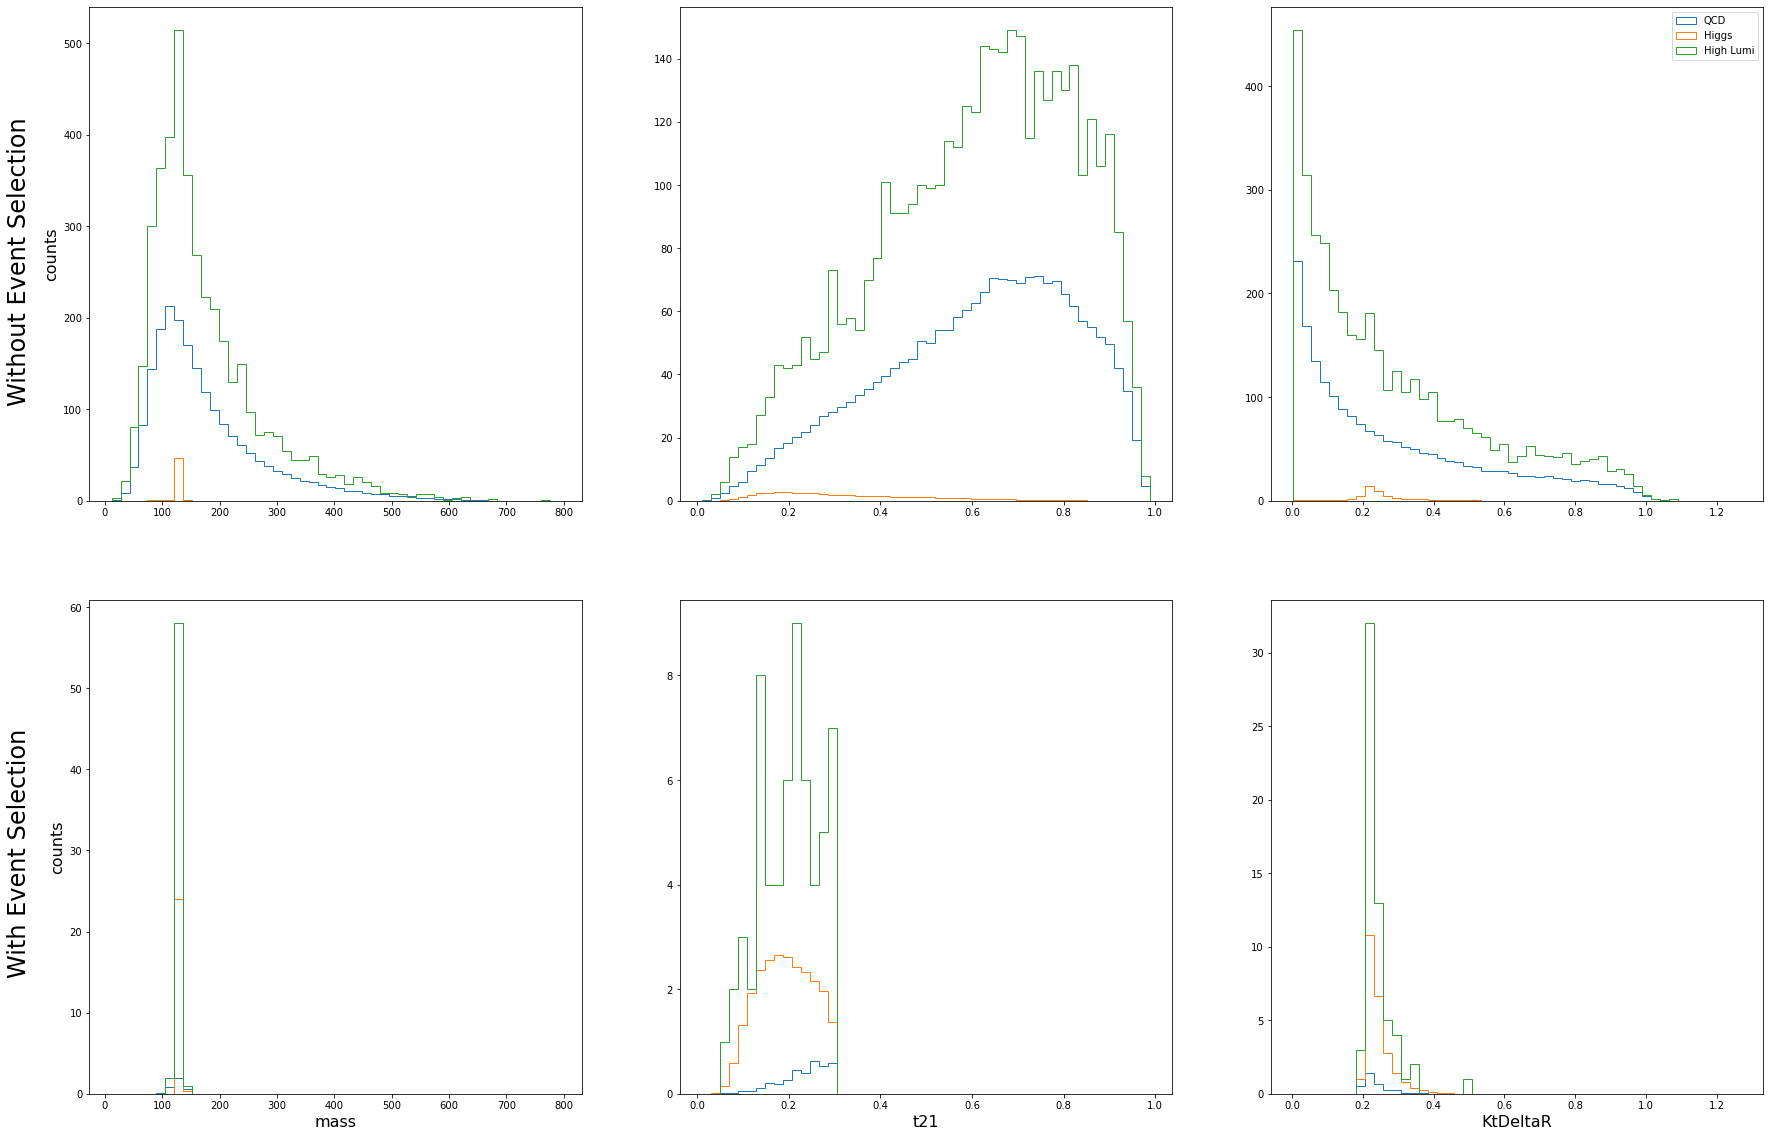

In [52]:
selection_keys = ['mass', 't21', 'KtDeltaR']

fig, ax = plt.subplots(2, 3, figsize = (30,20))
xlim = []
bins = []
for i in range(len(selection_keys)):
    hist1 = ax[0,i].hist(qcd[selection_keys[i]], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD')
    hist2 = ax[0,i].hist(higgs[selection_keys[i]], weights = np.ones(len(higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs')
    hist3 = ax[0,i].hist(highLumi[selection_keys[i]], bins = hist1[1], histtype = 'step', label = 'High Lumi')
    
    bins.append(hist1[1])
    xlim.append(ax[0,i].get_xlim())    
for i in range(len(selection_keys)):
    hist1 = ax[1,i].hist(selected_qcd[selection_keys[i]], weights = np.ones(len(selected_qcd))*normalization_qcd, bins = bins[i], histtype = 'step', label = 'QCD')
    hist2 = ax[1,i].hist(selected_higgs[selection_keys[i]], weights = np.ones(len(selected_higgs))*normalization_higgs, bins = bins[i], histtype = 'step', label = 'Higgs')
    hist3 = ax[1,i].hist(selected_highLumi[selection_keys[i]], bins = bins[i], histtype = 'step', label = 'High Lumi')
    
    ax[1,i].set_xlim(xlim[i])
    ax[1,i].set_xlabel(selection_keys[i], fontsize = 16)
    
ax[0,0].set_ylabel('counts', fontsize = 16)    
ax[1,0].set_ylabel('counts', fontsize = 16)
ax[0,2].legend()
ax[0,0].text(-170 , 110, "Without Event Selection", rotation = 'vertical', fontsize = 24)
ax[1,0].text(-170 , 15, "With Event Selection", rotation = 'vertical', fontsize = 24)
plt.show()

In [53]:
sigma_highLumi = calculate_sigma(selected_highLumi, highLumi)
print(f'high lumi sigma: {sigma_highLumi: .2f}')

sigma_highLumi = approximate_sigma(selected_highLumi, highLumi)
print(f'high lumi sigma: {sigma_highLumi: .2f}')

high lumi sigma:  inf
high lumi sigma:  7.81


In Lab 7, the expected sigma was 8.

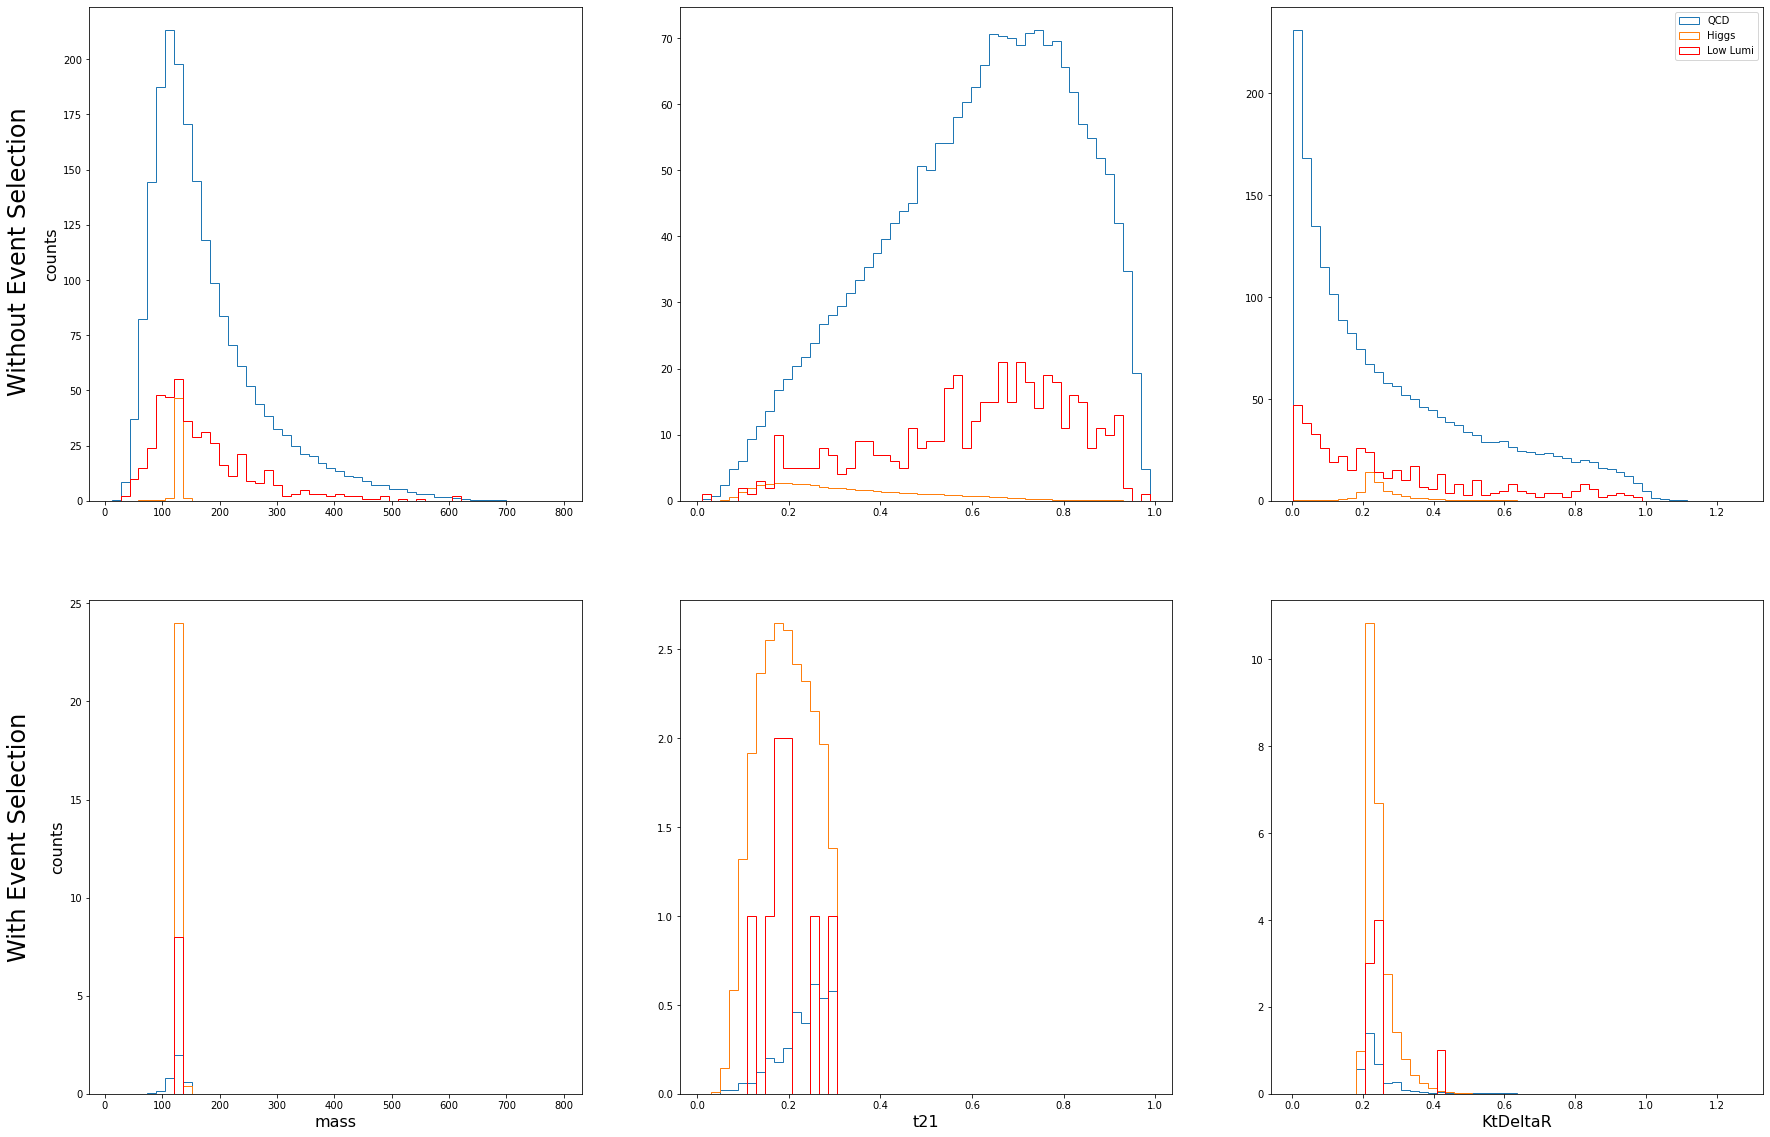

In [54]:
selection_keys = ['mass', 't21', 'KtDeltaR']

fig, ax = plt.subplots(2, 3, figsize = (30,20))
xlim = []
ylim = []
bins = []
for i in range(len(selection_keys)):
    hist1 = ax[0,i].hist(qcd[selection_keys[i]], weights = np.ones(len(qcd))*normalization_qcd, bins = 50, histtype = 'step', label = 'QCD')
    bins.append(hist1[1])
    hist2 = ax[0,i].hist(higgs[selection_keys[i]], weights = np.ones(len(higgs))*normalization_higgs, bins = hist1[1], histtype = 'step', label = 'Higgs')

    hist3 = ax[0,i].hist(lowLumi[selection_keys[i]], bins = hist1[1], histtype = 'step', label = 'Low Lumi', color = 'r')
    xlim.append(ax[0,i].get_xlim())
    ylim.append(ax[0,i].get_ylim())
    
for i in range(len(selection_keys)):
    hist1 = ax[1,i].hist(selected_qcd[selection_keys[i]], weights = np.ones(len(selected_qcd))*normalization_qcd, bins = bins[i], histtype = 'step', label = 'QCD')
    hist2 = ax[1,i].hist(selected_higgs[selection_keys[i]], weights = np.ones(len(selected_higgs))*normalization_higgs, bins = bins[i], histtype = 'step', label = 'Higgs')

    hist3 = ax[1,i].hist(selected_lowLumi[selection_keys[i]], bins = bins[i], histtype = 'step', label = 'Low Lumi', color = 'r')
    ax[1,i].set_xlim(xlim[i])
    ax[1,i].set_xlabel(selection_keys[i], fontsize = 16)
    
ax[0,0].set_ylabel('counts', fontsize = 16)    
ax[1,0].set_ylabel('counts', fontsize = 16)
ax[0,2].legend()
ax[0,0].text(-170 , 50, "Without Event Selection", rotation = 'vertical', fontsize = 24)
ax[1,0].text(-170 , 7, "With Event Selection", rotation = 'vertical', fontsize = 24)
plt.show()

In [33]:
sigma_lowLumi = approximate_sigma(selected_lowLumi, lowLumi)
print(f'low lumi sigma: {sigma_lowLumi: .2f}')

low lumi sigma:  2.83


In Lab 7, the expected sigma was 8. The low lumi data did not pass the 5$\sigma$ threshold for discovery. This means that the features I selected did not match the low lumi data well to remove background.

In [34]:
prob5sigma = 1/3.5e6
n_qcd = 2000
n_higgs = 50

expected_5sig_signal = stats.poisson.isf(prob5sigma, n_qcd) - n_qcd
observed_5sig_signal = stats.poisson.isf(prob5sigma, len(lowLumi)) - len(lowLumi)

print(expected_5sig_signal, observed_5sig_signal)

228.0 109.0


## Problem 3

I modeled the qcd background using a Poisson distribution with the number particles in selected qcd as the mu. The signal injected is uniform ranging from 0-400 because the 5$\sigma$ corresponds to 228 particles. The upper range of injected signal should be much greater than the 5$\sigma$ signal. The true signal is 40, which is the number of Higgs particles after event selection. 

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168]


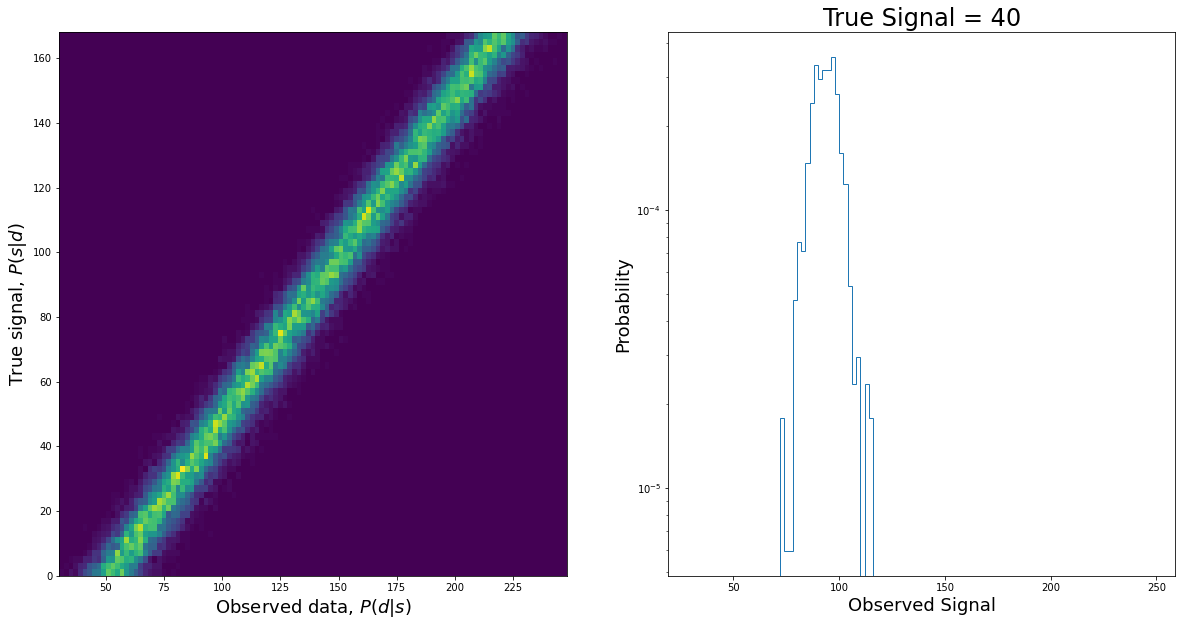

the mean is: 96


In [36]:
mu = 52
size = 100000
bkgd = stats.poisson.rvs(mu, size = size)
signal = stats.uniform.rvs(loc = 0, scale = 400, size = size)

data = signal + bkgd

signaledges = np.arange(0, 170, 2)
dataedges = np.arange(30, 250, 2)

fig, ax = plt.subplots(1,2, figsize = (20,10))
p, xedges, yedges, img = ax[0].hist2d(data, signal, bins = [dataedges, signaledges], density = True)
print(yedges)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 18)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 18)

index = np.where(yedges == 40)[0]

ax[1].stairs(p.T[index][0], xedges)
ax[1].semilogy()

ax[1].set_xlabel('Observed Signal', fontsize = 18)
ax[1].set_ylabel('Probability', fontsize = 18)
ax[1].set_title('True Signal = 40', fontsize = 24)
plt.show()

mean_expected = xedges[np.argmax(p.T[index][0])]
print('the mean is: ' + str(mean_expected))

Here I model the background as a Poisson distribution with mu of the number of particles after event selection in low lumi data. The injected signal is uniform ranging from 0-300 because the 5$\sigma$ threshold of low lumi data is 109. The true signal is 33 because that is the number of particles left after event selection of low lumi data.

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
 181 183 185 187 189 191 193 195 197 199]


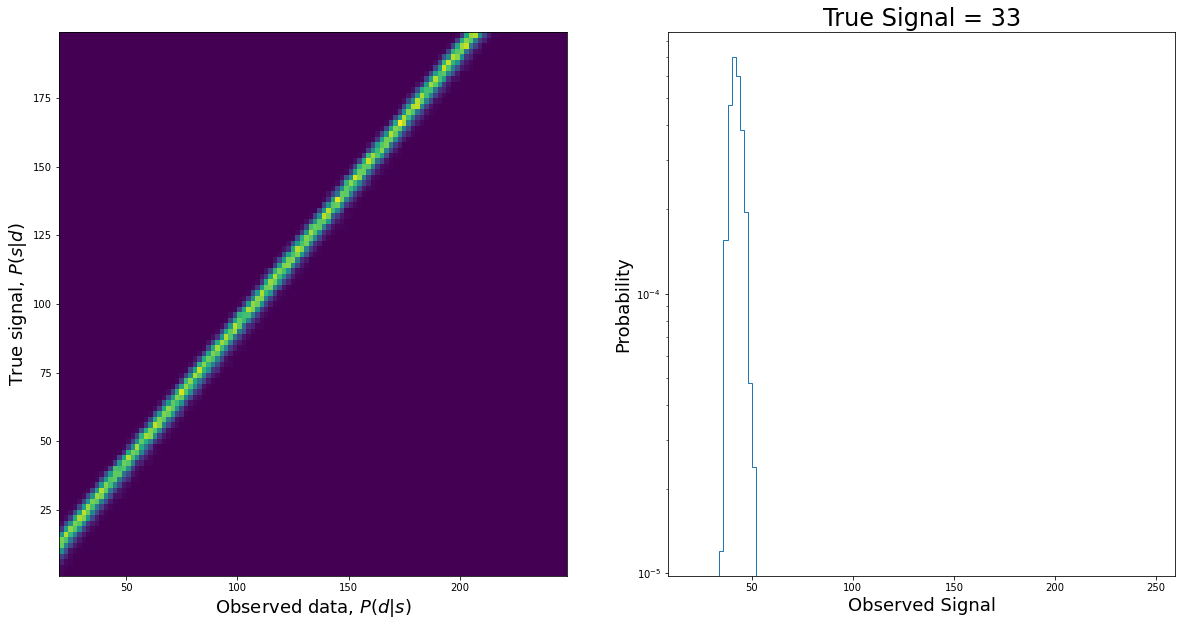

the mean is: 40


In [35]:
mu = len(selected_lowLumi)
size = 100000
bkgd = stats.poisson.rvs(mu, size = size)
signal = stats.uniform.rvs(loc = 0, scale = 300, size = size)

data = signal + bkgd

signaledges = np.arange(1, 200, 2)
dataedges = np.arange(20, 250, 2)

fig, ax = plt.subplots(1,2, figsize = (20,10))
p, xedges, yedges, img = ax[0].hist2d(data, signal, bins = [dataedges, signaledges], density = True)
print(yedges)
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 18)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 18)

index = np.where(yedges == 33)[0]

ax[1].stairs(p.T[index][0], xedges)
ax[1].semilogy()

ax[1].set_xlabel('Observed Signal', fontsize = 18)
ax[1].set_ylabel('Probability', fontsize = 18)
ax[1].set_title('True Signal = 33', fontsize = 24)
plt.show()

mean_observed = xedges[np.argmax(p.T[index][0])]
print('the mean is: ' + str(mean_observed))

Next, I can calculate the 95% upper limit by modeling a Poisson distribution with the means from above and integrating to 95% from $-\infty$

In [43]:
def calculate_95(mean):
    result = stats.poisson.ppf(0.95, mean)
    return result

In [45]:
expected_95 = calculate_95(mean_expected)
observed_95 = calculate_95(mean_observed)

print(f'The expected 95% confidence interval upper limit is: {expected_95}')
print(f'The observed 95% confidence interval upper limit is: {observed_95}')

The expected 95% confidence interval upper limit is: 112.0
The observed 95% confidence interval upper limit is: 51.0
